In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temp = session.query(Measurement.tobs).\
            filter(func.strftime("%m",Measurement.date) == "06").all()
print (june_temp_df)


NameError: name 'june_temp_df' is not defined

In [5]:
#  3. Convert the June temperatures to a list.
june_temp_list = list(np.ravel(june_temp)) 
print(june_temp_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp_list, columns =["Jume Temps"])
print (june_temp_df)

      Jume Temps
0           78.0
1           76.0
2           78.0
3           76.0
4           77.0
...          ...
1695        79.0
1696        74.0
1697        74.0
1698        76.0
1699        75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()


,Jume Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
#Another method to prepare the stats with date so we can verify the results return from the database 

# check the data frame and data using date in the query and create data frame using the two columns
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
june_temp = session.query(Measurement.date,Measurement.tobs).\
            filter(func.strftime("%m",Measurement.date) == "06").all()
june_temp_df = pd.DataFrame(june_temp , columns = ["date", "temp"])
#print (june_temp_df)
june_temp_df.set_index(june_temp_df["date"], inplace=True)
june_temp_df = june_temp_df.sort_index()

#print the data frame without index
#print (june_temp_df.to_string(index=False))
june_temp_df.describe()




,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp_results = session.query (Measurement.tobs).\
                  filter (func.strftime("%m", Measurement.date) == "12").all()
print(dec_temp_results)


[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp_list = list(np.ravel(dec_temp_results))
print (dec_temp_list)


[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp_list, columns = ["Dec Temps"])
print (dec_temp_df)


      Dec Temps
0          76.0
1          74.0
2          74.0
3          64.0
4          64.0
...         ...
1512       71.0
1513       71.0
1514       69.0
1515       65.0
1516       65.0

[1517 rows x 1 columns]


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()


,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


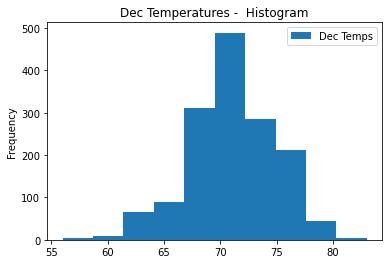

In [58]:
ax=dec_temp_df.plot.hist()
ax.set_title('Dec Temperatures -  Histogram')
ax.figure.savefig("Images/DecTemp_histogram.png")

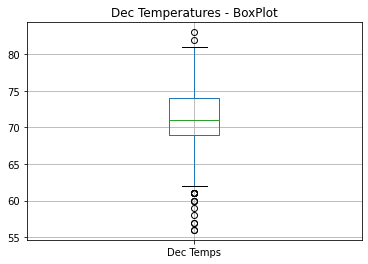

In [57]:
ax=dec_temp_df.boxplot()
ax.set_title('Dec Temperatures - BoxPlot')
ax.figure.savefig("Images/Dec_boxplot.png")

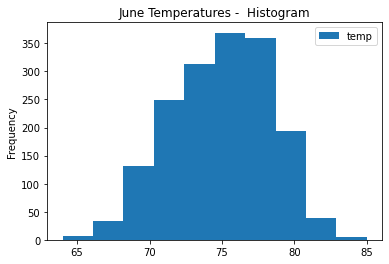

In [49]:
ax=june_temp_df.plot.hist()
ax.set_title('June Temperatures -  Histogram')
ax.figure.savefig("Images/Jun_Temp_histogram.png")

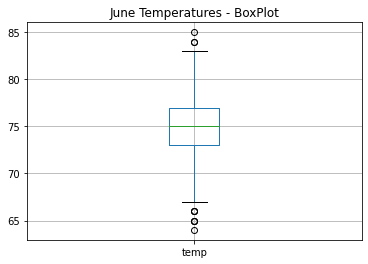

In [50]:
ax=june_temp_df.boxplot()
ax.set_title('June Temperatures - BoxPlot')
ax.figure.savefig("Images/Jun_boxplot.png")